In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import fashion_mnist, cifar100
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# fashion_mnist dataset 로드
(X_train,y_train),(X_test,y_test) = cifar100.load_data()

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


### 1. 로드한 이미지의 특징에 대해 간단히 서술하시오. (가로/세로 픽셀 수 및 채널)

100


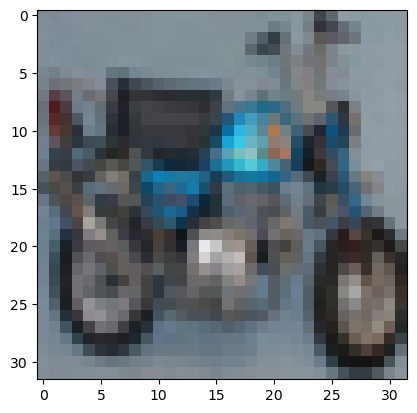

In [7]:
print(len(np.unique(y_train)))
plt.imshow(X_train[10000])

[정답] 32x32 픽셀로 이루어져 있으며, 3개의 채널로 구성된 이미지들로 구성되어 있습니다. 총 클래스의 숫자는 100개입니다.

### 2. training data와 test data의 수는 각각 몇 개의 이미지인가?

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


[정답] training_data는 50000개, test_data는 10000개로 이루어져 있습니다.

### 3. 로드한 데이터는 총 몇 개의 class로 구성되어 있는가? (hint: y의 최소값 및 최대값)

In [10]:
y_val = np.unique(y_train)
print('class의 종류: ', y_val)
print('class의 수:', len(y_val))

class의 종류:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
class의 수: 100


[정답] 100개의 class로 이루어져 있습니다.

### 4. 아래와 같은 순서의 CNN 모델을 구성하시오.

- 1) Convolution layer 3x3 kernels 32개
- 2) Max Pooling layer 2x2 window
- 3) Convolution layer 2x2 kernels 32개
- 4) Max Pooling layer 2x2 window
- 5) Flatten layer
- 6) 이후 layer는 자유롭게 구성

In [23]:
CNN_model = Sequential([
    Conv2D(32,(3,3),strides=(1,1),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(32,(2,2),strides=(1,1),activation='relu'),
    MaxPooling2D((2,2), strides=(2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(100,activation='softmax')
])

### 5. CNN을 구성하는 convolutional layer와 pooling layer의 역할에 대해 간단히 설명하시오.

convolutional layer는 합성곱층으로서 입력 이미지의 특징을 추출하는 층입니다. 추가로 각 pixel에 가중치를 곱하여 새로운 pixel값으로 구성된 image를 만드는 과정입니다.
pooling layer는 다운 샘플링을 통해 image의 특징을 유지하면서 공간 해상도를 줄여, 계산량을 감소시키고, 네트워크 복잡성을 낮춥니다.

### 6. 이미지 데이터(x_train과 x_test) 각 픽셀의 최대값과 최소값을 얼마인가?

In [24]:
max_pixel_value = np.max(np.concatenate([X_train, X_test]))
min_pixel_value = np.min(np.concatenate([X_train, X_test]))
max_pixel_value, min_pixel_value

(255, 0)

[정답] 픽셀의 최대값과 최소값은 (255, 0)이다.

### 7. 이미지 데이터(x_train과 x_test)의 값이 0과 1사이의 값이 되도록 정규화 하는 코드를 작성하시오.

- 정규화된 데이터를 Xtrain과 Xtest에 저장하시오.

In [25]:
# 코드 작성
Xtrain = X_train/255
Xtest = X_test/255

### 8. compile 및 학습하시오. (batch size는 300이상, epochs은 30 내외로 설정하고, 학습데이터의 30%(0.3)을 검증(validation)에 이용하시오.)

In [26]:
# 코드 작성
CNN_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

ep = 30
batch = 300
val_ratio = 0.3

CNN_result = CNN_model.fit(Xtrain, y_train,
                           epochs=ep,
                           batch_size=batch,
                           validation_split=val_ratio)

Epoch 1/30
117/117 [==============================] - 6s 52ms/step - loss: 4.1042 - acc: 0.0803 - val_loss: 3.6909 - val_acc: 0.1390
Epoch 2/30
117/117 [==============================] - 6s 50ms/step - loss: 3.4279 - acc: 0.1877 - val_loss: 3.3222 - val_acc: 0.2055
Epoch 3/30
117/117 [==============================] - 6s 48ms/step - loss: 3.1094 - acc: 0.2451 - val_loss: 3.1246 - val_acc: 0.2435
Epoch 4/30
117/117 [==============================] - 6s 48ms/step - loss: 2.8681 - acc: 0.2913 - val_loss: 2.9466 - val_acc: 0.2778
Epoch 5/30
117/117 [==============================] - 6s 47ms/step - loss: 2.6951 - acc: 0.3234 - val_loss: 2.9041 - val_acc: 0.2878
Epoch 6/30
117/117 [==============================] - 6s 48ms/step - loss: 2.5404 - acc: 0.3555 - val_loss: 2.7686 - val_acc: 0.3148
Epoch 7/30
117/117 [==============================] - 5s 47ms/step - loss: 2.3980 - acc: 0.3869 - val_loss: 2.7373 - val_acc: 0.3225
Epoch 8/30
117/117 [==============================] - 5s 47ms/step - 

### 9. 위에서 생성한 model에 x_test 이미지를 적용했을 때의 정확도를 구하시오.

In [28]:
# 코드 작성
# 정확도: ??
CNN_model.evaluate(Xtest,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 5.3622 - acc: 0.3346


[5.362198829650879, 0.3346000015735626]

정확도 : 0.3346000015735626

### 10. 잘못 분류된 이미지 데이터 3개를 plot하고 실제 class와 예측한 class의 결과를 함께 보여주시오.

313/313 [==============================] - 1s 3ms/step
0 번째 case
실제값 :  [49]
예측값 :  2
___________
1 번째 case
실제값 :  [33]
예측값 :  31
___________
2 번째 case
실제값 :  [72]
예측값 :  15
___________


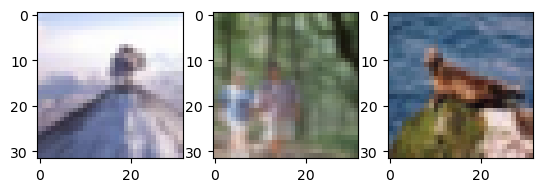

In [36]:
# 코드 작성
pred = CNN_model.predict(Xtest)
pred_classes = np.argmax(pred, axis=1)

wrong_ind = np.argwhere(y_test.ravel() != pred_classes)

for i in range(3):
    plt.subplot(1, 3, i+1)
    n = int(wrong_ind[i])
    plt.imshow(X_test[n])
    print(i, '번째 case')
    print('실제값 : ', y_test[n])
    print('예측값 : ', pred_classes[n])
    print('___________')